In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [3]:
# Local CSV dataset paths
train_path = "dataset/CIFR(Ass2&3)/train_data.csv"
test_path  = "dataset/CIFR(Ass2&3)/test_data.csv"

# Load CSVs
train_df = pd.read_csv(train_path)
test_df  = pd.read_csv(test_path)

# Label is LAST column
y_train = train_df.iloc[:, -1].values
x_train = train_df.iloc[:, :-1].values

y_test = test_df.iloc[:, -1].values
x_test = test_df.iloc[:, :-1].values

# Normalize pixel values
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# CNN needs 4-D shape: (samples, 32, 32, 3)
x_train = x_train.reshape(-1, 32, 32, 3)
x_test  = x_test.reshape(-1, 32, 32, 3)

print("Training data:", x_train.shape, y_train.shape)
print("Testing data:", x_test.shape, y_test.shape)

Training data: (50000, 32, 32, 3) (50000,)
Testing data: (10000, 32, 32, 3) (10000,)


In [4]:
# b. Defining the model's CNN architecture

model = models.Sequential([
    tf.keras.Input(shape=(32, 32, 3)),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# c. Training the model

history = model.fit(
    x_train, y_train,
    epochs=12,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)

Epoch 1/12
704/704 ━━━━━━━━━━━━━━━━━━━━ 47s 65ms/step - accuracy: 0.4598 - loss: 1.4902 - val_accuracy: 0.5790 - val_loss: 1.2059
Epoch 2/12
704/704 ━━━━━━━━━━━━━━━━━━━━ 51s 73ms/step - accuracy: 0.6290 - loss: 1.0593 - val_accuracy: 0.6858 - val_loss: 0.9303
Epoch 3/12
704/704 ━━━━━━━━━━━━━━━━━━━━ 46s 65ms/step - accuracy: 0.6923 - loss: 0.8801 - val_accuracy: 0.7148 - val_loss: 0.8414
Epoch 4/12
704/704 ━━━━━━━━━━━━━━━━━━━━ 84s 68ms/step - accuracy: 0.7356 - loss: 0.7669 - val_accuracy: 0.7314 - val_loss: 0.7971
Epoch 5/12
704/704 ━━━━━━━━━━━━━━━━━━━━ 50s 71ms/step - accuracy: 0.7634 - loss: 0.6804 - val_accuracy: 0.7508 - val_loss: 0.7489
Epoch 6/12
704/704 ━━━━━━━━━━━━━━━━━━━━ 52s 74ms/step - accuracy: 0.7917 - loss: 0.5964 - val_accuracy: 0.7430 - val_loss: 0.7690
Epoch 7/12
704/704 ━━━━━━━━━━━━━━━━━━━━ 51s 73ms/step - accuracy: 0.8157 - loss: 0.5268 - val_accuracy: 0.7484 - val_loss: 0.7455
Epoch 8/12
704/704 ━━━━━━━━━━━━━━━━━━━━ 102s 101ms/step - accuracy: 0.8386 - loss: 0.4647 

In [9]:
# d. Estimating the model's performance

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest Accuracy:", test_acc)
print("Test Loss:", test_loss)

313/313 - 10s - 31ms/step - accuracy: 0.7381 - loss: 1.0039

Test Accuracy: 0.738099992275238
Test Loss: 1.0039385557174683


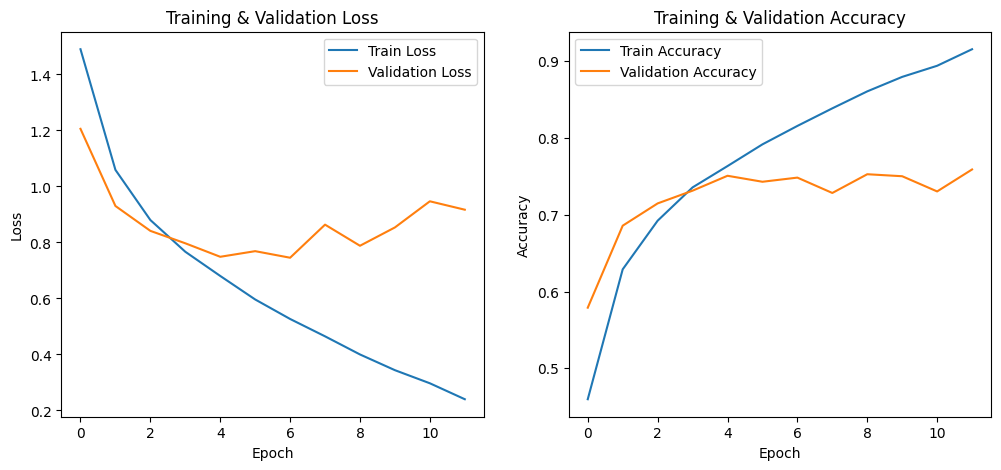

In [10]:
# OPTIONAL PLOTTING
plt.figure(figsize=(12,5))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

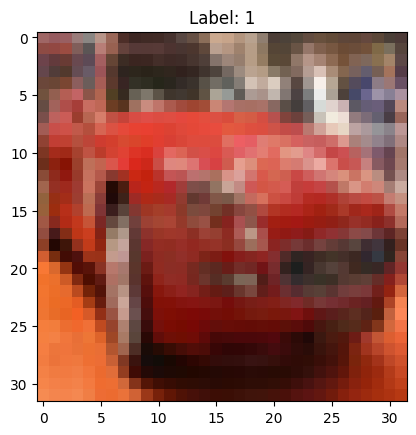

In [11]:
img = x_train[5].reshape(32, 32, 3)
plt.imshow(img)
plt.title(f"Label: {y_train[5]}")
plt.show()